# AWS Glue Studio Notebook
##### You are now running a AWS Glue Studio notebook; To start using your notebook you need to start an AWS Glue Interactive Session.


#### Optional: Run this cell to see available notebook commands ("magics").


In [ ]:
%help

####  Run this cell to set up and start your interactive session.


In [1]:
%idle_timeout 2880
%glue_version 4.0
%worker_type G.1X
%number_of_workers 5

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
  
sc = SparkContext.getOrCreate()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)

Current idle_timeout is None minutes.
idle_timeout has been set to 2880 minutes.
Setting Glue version to: 4.0
Previous worker type: None
Setting new worker type to: G.1X
Previous number of workers: None
Setting new number of workers to: 5
Trying to create a Glue session for the kernel.
Session Type: glueetl
Worker Type: G.1X
Number of Workers: 5
Idle Timeout: 2880
Session ID: 7957ca6f-9b04-4fd6-a65d-770a723ab1b9
Applying the following default arguments:
--glue_kernel_version 1.0.5
--enable-glue-datacatalog true
Waiting for session 7957ca6f-9b04-4fd6-a65d-770a723ab1b9 to get into ready status...
Session 7957ca6f-9b04-4fd6-a65d-770a723ab1b9 has been created.



#### Example: Create a DynamicFrame from a table in the AWS Glue Data Catalog and display its schema


In [2]:
vendas_zoop_silver_dyf = glueContext.create_dynamic_frame.from_catalog(
    database='db-glue-zoop', 
table_name='zoop-glue-vendas_zoop_silver_parquet_da19a7a51cb355a370f8e75f505434e4')
vendas_zoop_silver_dyf.printSchema()

root
|-- ID_venda: long
|-- Data: string
|-- Horario: string
|-- Canal_venda: string
|-- Origem_venda: string
|-- ID_produto: long
|-- Produto: string
|-- Categoria_produto: string
|-- Preco_unitario: double
|-- Quantidade: long
|-- Metodo_pagamento: string
|-- ID_cliente: long
|-- Nome_cliente: string
|-- Genero_cliente: string
|-- Idade_cliente: long
|-- Cidade_cliente: string
|-- UF_cliente: string
|-- Regiao_cliente: string
|-- Avaliacao: long


#### Example: Convert the DynamicFrame to a Spark DataFrame and display a sample of the data


In [3]:
vendas_zoop_silver_df = vendas_zoop_silver_dyf.toDF().toPandas()
vendas_zoop_silver_df

      ID_venda        Data   Horario  ... UF_cliente Regiao_cliente  Avaliacao
0         1549  2022-02-03  10:19:00  ...         CE       Nordeste          5
1         1975  2022-03-16  20:39:18  ...         AM          Norte          5
2         5446  2023-04-13  16:47:55  ...         SP        Sudeste          3
3          794  2021-11-18  15:21:00  ...         SP        Sudeste          3
4          865  2021-11-24  02:08:01  ...         SP        Sudeste          3
...        ...         ...       ...  ...        ...            ...        ...
9995      6052  2023-06-18  15:12:22  ...         MG        Sudeste          5
9996       949  2021-12-02  12:45:58  ...         SP        Sudeste          3
9997      9872  2024-08-05  09:05:00  ...         PB       Nordeste          2
9998      7688  2023-12-13  16:40:00  ...         PR            Sul          5
9999      3821  2022-10-11  14:57:00  ...         MG        Sudeste          5

[10000 rows x 19 columns]
/opt/amazon/spark/python/

#### Example: Visualize data with matplotlib


<BarContainer object of 5 artists>



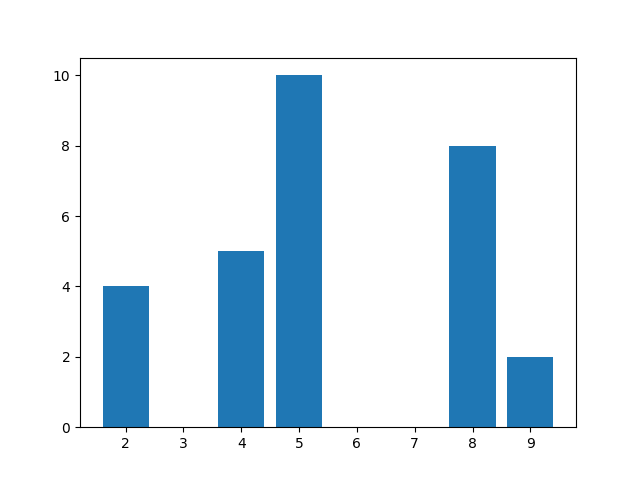

In [4]:
import matplotlib.pyplot as plt

# Set X-axis and Y-axis values
x = [5, 2, 8, 4, 9]
y = [10, 4, 8, 5, 2]
  
# Create a bar chart 
plt.bar(x, y)
  
# Show the plot
%matplot plt

In [8]:
%pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 38.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 118.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 115.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 19.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /usr/local/bin/.pyenv/versions/3.9.9/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import seaborn as sns

In [6]:
# Agrupar dados por Produto e Região de Cliente
vendas_agrupadas = vendas_zoop_silver_df.groupby(['Produto', 'Regiao_cliente'])['Quantidade'].sum().reset_index()

print(vendas_agrupadas)


                Produto Regiao_cliente  Quantidade
0       Aparelho de som   Centro-Oeste          76
1       Aparelho de som       Nordeste         154
2       Aparelho de som          Norte          50
3       Aparelho de som        Sudeste         367
4       Aparelho de som            Sul          58
..                  ...            ...         ...
145  Ventilador de teto   Centro-Oeste          59
146  Ventilador de teto       Nordeste         128
147  Ventilador de teto          Norte          36
148  Ventilador de teto        Sudeste         399
149  Ventilador de teto            Sul          40

[150 rows x 3 columns]


In [7]:
# Ordenar produtos pelos mais vendidos
top_5_produtos = vendas_agrupadas.groupby('Produto')['Quantidade'].sum().nlargest(5).index

print(top_5_produtos)


Index(['Smartphone', 'Chuveiro elétrico', 'Máquina de café',
       'Secador de cabelo', 'Liquidificador'],
      dtype='object', name='Produto')


In [8]:
# Filtrar os 5 produtos mais vendidos
vendas_top_5 = vendas_agrupadas[vendas_agrupadas['Produto'].isin(top_5_produtos)]

print(vendas_top_5)


               Produto Regiao_cliente  Quantidade
25   Chuveiro elétrico   Centro-Oeste          58
26   Chuveiro elétrico       Nordeste         170
27   Chuveiro elétrico          Norte          36
28   Chuveiro elétrico        Sudeste         407
29   Chuveiro elétrico            Sul          50
75      Liquidificador   Centro-Oeste          74
76      Liquidificador       Nordeste         173
77      Liquidificador          Norte          42
78      Liquidificador        Sudeste         364
79      Liquidificador            Sul          60
85     Máquina de café   Centro-Oeste          83
86     Máquina de café       Nordeste         101
87     Máquina de café          Norte          46
88     Máquina de café        Sudeste         432
89     Máquina de café            Sul          58
110  Secador de cabelo   Centro-Oeste          75
111  Secador de cabelo       Nordeste         152
112  Secador de cabelo          Norte          28
113  Secador de cabelo        Sudeste         395


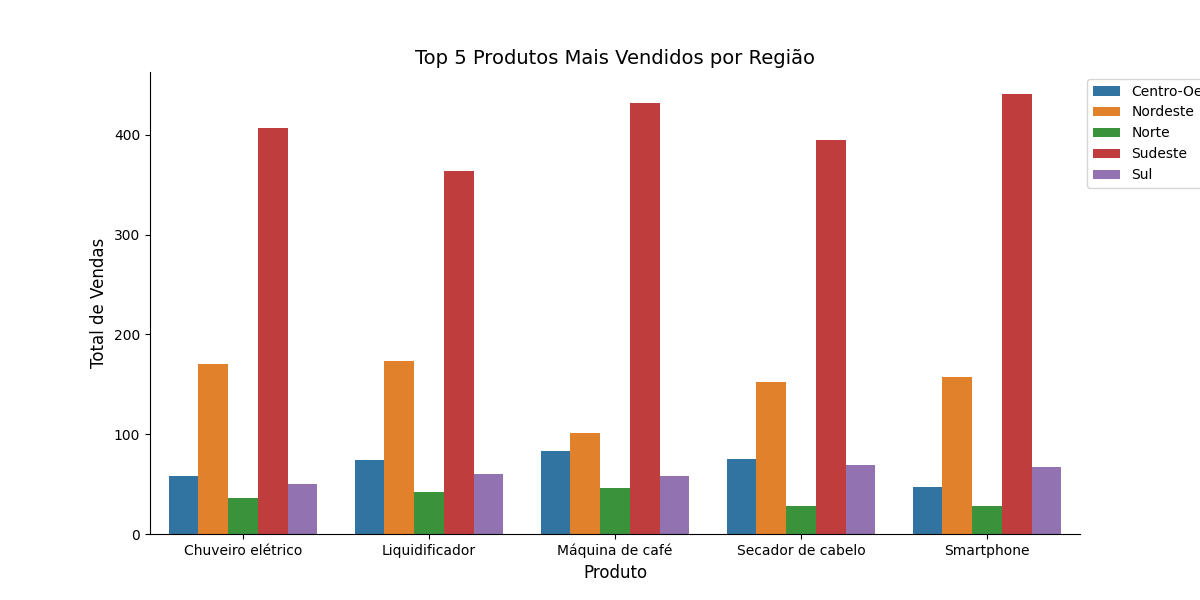

In [9]:
# Plotar o gráfico de vendas dos 5 produtos mais vendidos por região

plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_top_5, x='Produto', y='Quantidade', hue='Regiao_cliente')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Top 5 Produtos Mais Vendidos por Região', fontsize = 14)
plt.xticks(rotation=0)
plt.ylabel('Total de Vendas', fontsize = 12)
plt.xlabel('Produto', fontsize = 12)
sns.despine()

%matplot plt


In [10]:
# Agrupar os dados por Canal de Venda e calcular o total de vendas por canal
vendas_por_canal = vendas_zoop_silver_df.groupby('Canal_venda')['Quantidade'].sum().reset_index()
vendas_por_canal = vendas_por_canal.sort_values('Quantidade',ascending=False) 


[Text(0, 0, '6766'), Text(0, 0, '6677'), Text(0, 0, '6635')]



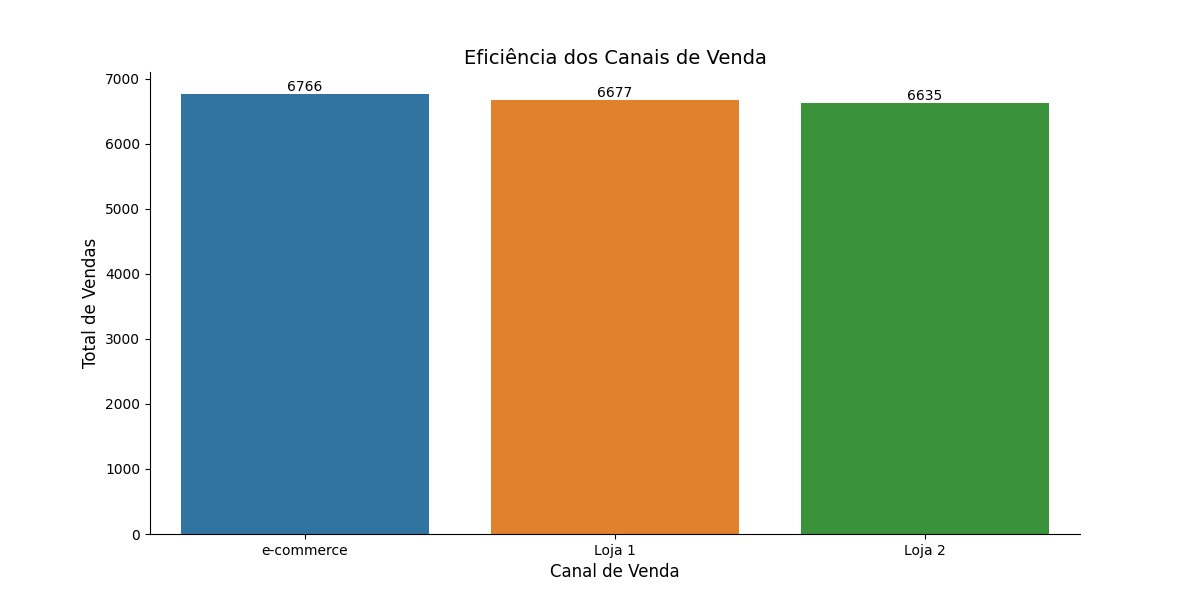

In [11]:
# Plotar o gráfico de vendas por canal de venda
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=vendas_por_canal, x='Canal_venda', y='Quantidade')
plt.title('Eficiência dos Canais de Venda', fontsize=14)
plt.ylabel('Total de Vendas', fontsize=12)
plt.xlabel('Canal de Venda', fontsize=12)
sns.despine()

# Adicionando os rótulos às barras
ax.bar_label(ax.containers[0])
%matplot plt

In [12]:
estoque_zoop_silver_dyf = glueContext.create_dynamic_frame.from_catalog(
    database='db-glue-zoop', 
    table_name='zoop-glue-estoques_zoop_silver_parquet_bfec2789a1656ecf172a8e596bb2d1e6')
estoque_zoop_silver_dyf.printSchema()


root
|-- ID_estoque: long
|-- ID_produto: long
|-- Produto: string
|-- Categoria_produto: string
|-- Data: string
|-- Horario: string
|-- Quantidade_em_estoque: long
|-- Quantidade_novos_produtos: long
|-- Quantidade_vendida: long


In [13]:
estoque_zoop_silver_df = estoque_zoop_silver_dyf.toDF().toPandas()
estoque_zoop_silver_df


      ID_estoque  ID_produto  ... Quantidade_novos_produtos Quantidade_vendida
0            625          25  ...                         9                 13
1            437          17  ...                        33                 14
2            694           4  ...                        49                 14
3            299          29  ...                        23                 18
4            339           9  ...                        11                 21
...          ...         ...  ...                       ...                ...
1135         803          23  ...                         6                 35
1136         892          22  ...                        12                 11
1137         291          21  ...                        21                  8
1138         565          25  ...                        40                 26
1139         713          23  ...                         2                 19

[1140 rows x 9 columns]
/opt/amazon/spark/python/li

In [14]:
# Agrupando por Produto e calculando total vendida e estoque restante

df_agrupado = estoque_zoop_silver_df.groupby('Produto').agg(
    total_vendida = ('Quantidade_vendida', 'sum'),
    total_novos = ('Quantidade_novos_produtos', 'sum')
).reset_index()


df_agrupado['estoque_restante'] = df_agrupado['total_novos'] - df_agrupado['total_vendida']


df_agrupado.head()


              Produto  total_vendida  total_novos  estoque_restante
0     Aparelho de som            705          947               242
1     Aspirador de pó            652         1015               363
2           Batedeira            627         1054               427
3           Cafeteira            709          943               234
4  Cafeteira expresso            706          917               211


In [15]:
# Ordenando os 10 primeiros pelo estoque restante

df_menores_estoques_restantes = df_agrupado.sort_values(by='estoque_restante').head(10)
print(df_menores_estoques_restantes)

                Produto  total_vendida  total_novos  estoque_restante
10       Forno elétrico            708          830               122
29   Ventilador de teto            662          795               133
5     Chuveiro elétrico            721          856               135
16          Micro-ondas            675          825               150
21  Relógio inteligente            711          892               181
24           Smartphone            740          944               204
4    Cafeteira expresso            706          917               211
22    Secador de cabelo            719          935               216
9        Fone de ouvido            657          873               216
15       Liquidificador            713          939               226


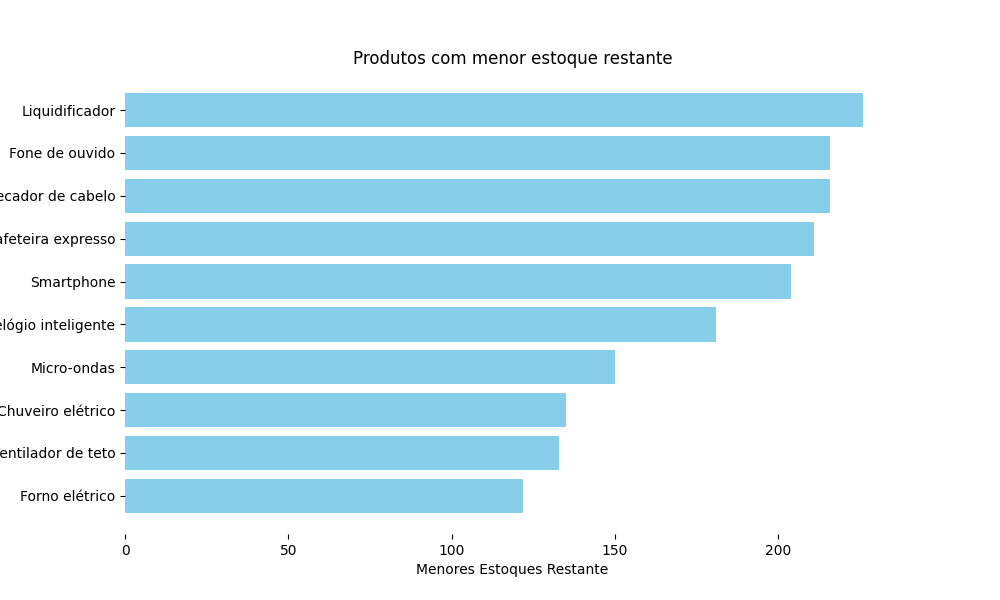

In [16]:
# Gerando o gráfico de barras

fig,ax=plt.subplots(figsize=(10, 6))
plt.barh(df_menores_estoques_restantes['Produto'], df_menores_estoques_restantes['estoque_restante'], color='skyblue')
plt.xlabel('Menores Estoques Restante')
plt.ylabel('Produto')
plt.title('Produtos com menor estoque restante')
ax.set_frame_on(False)

%matplot plt

In [17]:
redes_sociais_zoop_silver_dyf = glueContext.create_dynamic_frame.from_catalog(
    database='db-glue-zoop', 
    table_name='zoop-glue-redes_sociais_zoop_silver_parquet_6647e4905c41077c00dedba327f0a753')
redes_sociais_zoop_silver_dyf.printSchema()


root
|-- ID_social: long
|-- Data: string
|-- Influencia_autor: long
|-- Plataforma: string
|-- Nome_produto: string
|-- Categoria_produto: string
|-- Avaliacao: long
|-- Comentario: string


In [18]:
redes_sociais_zoop_silver_df = redes_sociais_zoop_silver_dyf.toDF().toPandas()
redes_sociais_zoop_silver_df


      ID_social  ...                                         Comentario
0          8175  ...             Adorei! Funciona perfeitamente. #TVBox
1          5573  ...  Entrega rápida e produto conforme descrito. #F...
2          3464  ...  Não tem nada de especial, mas cumpre a função....
3           327  ...  Cumpre o que promete, mas poderia ser melhor. ...
4          4619  ...  Produto excelente! Recomendo muito. #Ventilado...
...         ...  ...                                                ...
9995       1363  ...  Produto incrível! Desempenho muito acima da mé...
9996       5485  ...  Produto incrível! Desempenho muito acima da mé...
9997        969  ...  Cumpre o que promete, mas poderia ser melhor. ...
9998       4472  ...  Qualidade baixa. Me arrependi de ter comprado....
9999       2145  ...  Qualidade excepcional. Estou muito feliz com a...

[10000 rows x 8 columns]
/opt/amazon/spark/python/lib/pyspark.zip/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is i

In [25]:
import pandas as pd

In [26]:
# Unir os dados de redes sociais e vendas para análise

social_vendas = pd.merge(redes_sociais_zoop_silver_df, vendas_zoop_silver_df, left_on='Nome_produto', right_on='Produto')

print(social_vendas.columns)

Index(['ID_social', 'Data_x', 'Influencia_autor', 'Plataforma', 'Nome_produto',
       'Categoria_produto_x', 'Avaliacao_x', 'Comentario', 'ID_venda',
       'Data_y', 'Horario', 'Canal_venda', 'Origem_venda', 'ID_produto',
       'Produto', 'Categoria_produto_y', 'Preco_unitario', 'Quantidade',
       'Metodo_pagamento', 'ID_cliente', 'Nome_cliente', 'Genero_cliente',
       'Idade_cliente', 'Cidade_cliente', 'UF_cliente', 'Regiao_cliente',
       'Avaliacao_y'],
      dtype='object')


In [27]:
# Agrupar por produto e avaliação, somando as vendas

social_vendas_agrupadas = social_vendas.groupby(['Nome_produto', 'Avaliacao_x'])['Quantidade'].sum().reset_index()

print(social_vendas_agrupadas)

           Nome_produto  Avaliacao_x  Quantidade
0       Aparelho de som            1       18330
1       Aparelho de som            2       20445
2       Aparelho de som            3       32430
3       Aparelho de som            4       78255
4       Aparelho de som            5       97995
..                  ...          ...         ...
145  Ventilador de teto            1       13240
146  Ventilador de teto            2       23170
147  Ventilador de teto            3       31114
148  Ventilador de teto            4       56932
149  Ventilador de teto            5       95328

[150 rows x 3 columns]


Text(0, 0.5, 'Total de Vendas')



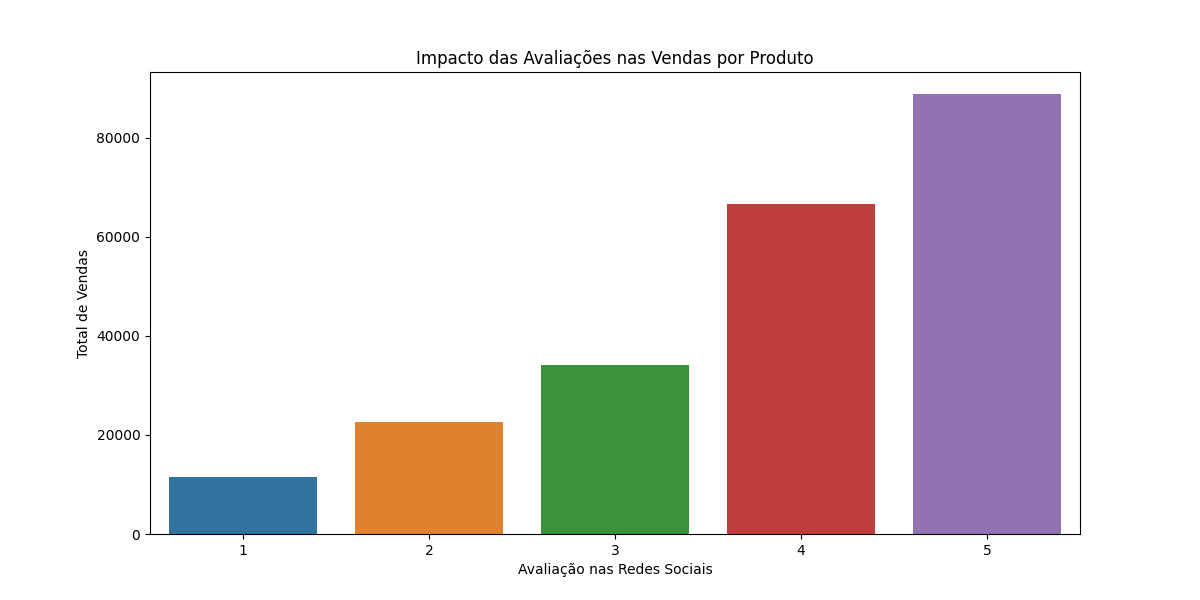

In [28]:
# Plotar gráfico de vendas por avaliação nas redes sociais

plt.figure(figsize=(12, 6))
sns.barplot(data=social_vendas_agrupadas, x='Avaliacao_x', y='Quantidade',errorbar=None)
plt.title('Impacto das Avaliações nas Vendas por Produto')
plt.xlabel('Avaliação nas Redes Sociais')
plt.ylabel('Total de Vendas')

%matplot plt